# Model training and evaluation
The best model is Logistic Regression. This phase trains and saves the model using joblib.

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/final-dataset.csv")
df.shape

(5000, 18)

### split the dataset

In [3]:
X = df.drop(columns=['is_promoted'])
y = df['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### order of features in training

In [4]:
X.columns

Index(['age', 'gender', 'department', 'education', 'tenure_years',
       'trainings_attended', 'awards_won', 'job_level', 'region',
       'recruitment_channel', 'work_type', 'language_count', 'multilingual',
       'international_hire', 'weighted_performance_index',
       'high_achiever_flag', 'training_efficiency'],
      dtype='object')

### setting up the model

In [5]:
model = LogisticRegression(
    solver='liblinear', 
    class_weight='balanced', 
    random_state=42
)

### Hyperparameter tuning
With ROC AUC score, GridSearchCV is used to find the best balance

In [6]:
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3, # 3-fold cross-validation
)

grid_search.fit(X_train, y_train)

grid_search

,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': [0.1, 1.0, ...], 'penalty': ['l1', 'l2']}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [7]:
# select the best estimator
best_model = grid_search.best_estimator_

best_model

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [8]:
# best paramters and CV score 
grid_search.best_params_, grid_search.best_score_

({'C': 0.1, 'penalty': 'l1'}, np.float64(0.6342722350852732))

### EValuate the best model


In [9]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# metrics
final_report = classification_report(y_test, y_pred)
final_cm = confusion_matrix(y_test, y_pred)
final_roc_auc = roc_auc_score(y_test, y_proba)

print(f"ROC AUC Score: {final_roc_auc:.4f}")

print("Classification report")
print(final_report)

ROC AUC Score: 0.6398
Classification report
              precision    recall  f1-score   support

           0       0.82      0.61      0.70       766
           1       0.31      0.57      0.40       234

    accuracy                           0.60      1000
   macro avg       0.57      0.59      0.55      1000
weighted avg       0.70      0.60      0.63      1000



### Plotting the final confusion matrix

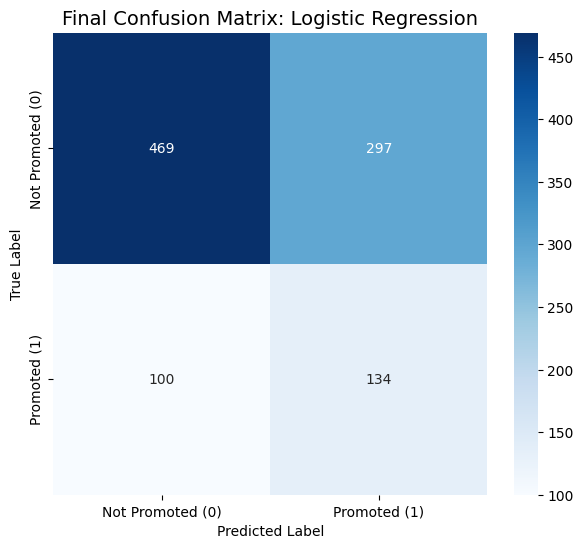

In [10]:
plt.figure(figsize=(7, 6))
sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Promoted (0)', 'Promoted (1)'],
            yticklabels=['Not Promoted (0)', 'Promoted (1)'])
plt.title(f'Final Confusion Matrix: Logistic Regression', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('../final_confusion_matrix_logistic.png')
plt.show()

### Save model

In [11]:
joblib.dump(best_model, "../karim-promotion-ai.joblib")

['../karim-promotion-ai.joblib']